In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_25128\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the StandardScaler PCA dataset

In [7]:
minmaxPCA=pd.read_csv('PCA_StandardScaler_data2.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,priceUSD
0,0,9.714659,0.0495
1,1,9.204315,0.0726
2,2,9.510160,0.0859
3,3,10.152335,0.0783
4,4,8.803033,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,priceUSD
0,9.714659,0.0495
1,9.204315,0.0726
2,9.510160,0.0859
3,10.152335,0.0783
4,8.803033,0.0767
...,...,...
1551,-1.958755,393.7880
1552,-1.896040,386.2650
1553,-1.845171,379.4510
1554,-1.853071,384.7020


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Printing R2 score

In [12]:
r_squared = regressor.score(X, y)
print(r_squared)

0.03771940882618385


In [13]:
y_pred = regressor.predict(X_test)

### Displaying adjusted R2

In [14]:
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.03710018064653542

### Accuracy on linear regression

In [15]:
regressor.score(X_train,y_train)
pred=regressor.predict(X_test)
regressor.score(X_test,y_test)

0.02795190440102291

### Visualising the Training set results

### Visualising the Test set results

### Gradient boosting Model and its parameter

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [17]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [18]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.1)

 The best score across ALL searched params:
 0.39864447646590945

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.1}


### Training the Random forest regression model on the whole dataset

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [20]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    return y_test,y_predict

In [21]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
R2 score: 0.25055071412507945
Best Score: 0.30346730019407964
Best params: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  1
--------------
R2 score: 0.25695592698049374
Best Score: 0.3031002516579376
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  2
--------------
R2 score: 0.23182924441577968
Best Score: 0.31029625158142526
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  3
--------------
R2 score: 0.25910598939827856
Best Score: 0.31037743639329346
Best params: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  4
--------------
R2 score: 0.2234786178426028
Best Score: 0.3013176083629424
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 20}


### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 7ms/step - loss: 170.0184 - mean_absolute_error: 165.5259 - val_loss: 129.1831 - val_mean_absolute_error: 127.8063
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 163.5038 - mean_absolute_error: 162.2999 - val_loss: 123.7905 - val_mean_absolute_error: 122.8210
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 161.2727 - mean_absolute_error: 160.4926 - val_loss: 123.4179 - val_mean_absolute_error: 122.7692
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 161.0307 - mean_absolute_error: 160.3943 - val_loss: 123.3135 - val_mean_absolute_error: 122.8028
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 160.9112 - mean_absolute_error: 160.3763 - val_loss: 123.3852 - val_mean_absolute_error: 122.8220
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 160.7474 - mean_absolute_error: 160.2679 - val_loss: 123.1331 - val_mean

Epoch 49/100
63/63 [==============================] - 0s 2ms/step - loss: 158.7280 - mean_absolute_error: 157.9851 - val_loss: 121.7980 - val_mean_absolute_error: 121.0094
Epoch 50/100
63/63 [==============================] - 0s 2ms/step - loss: 158.2917 - mean_absolute_error: 157.4951 - val_loss: 121.5402 - val_mean_absolute_error: 120.6993
Epoch 51/100
63/63 [==============================] - 0s 2ms/step - loss: 157.8880 - mean_absolute_error: 157.0162 - val_loss: 121.4255 - val_mean_absolute_error: 120.4565
Epoch 52/100
63/63 [==============================] - 0s 2ms/step - loss: 157.4849 - mean_absolute_error: 156.4555 - val_loss: 121.4533 - val_mean_absolute_error: 120.2614
Epoch 53/100
63/63 [==============================] - 0s 2ms/step - loss: 156.8494 - mean_absolute_error: 155.5556 - val_loss: 120.9229 - val_mean_absolute_error: 119.4571
Epoch 54/100
63/63 [==============================] - 0s 2ms/step - loss: 154.3386 - mean_absolute_error: 152.5990 - val_loss: 120.7849 - va

63/63 [==============================] - 0s 2ms/step - loss: 108.9602 - mean_absolute_error: 105.7991 - val_loss: 73.5088 - val_mean_absolute_error: 70.3579
Epoch 98/100
63/63 [==============================] - 0s 2ms/step - loss: 107.7018 - mean_absolute_error: 104.6027 - val_loss: 74.1331 - val_mean_absolute_error: 71.0456
Epoch 99/100
63/63 [==============================] - 0s 2ms/step - loss: 107.8461 - mean_absolute_error: 104.7694 - val_loss: 77.7058 - val_mean_absolute_error: 74.5988
Epoch 100/100
63/63 [==============================] - 0s 2ms/step - loss: 108.6041 - mean_absolute_error: 105.5287 - val_loss: 73.2334 - val_mean_absolute_error: 70.2116


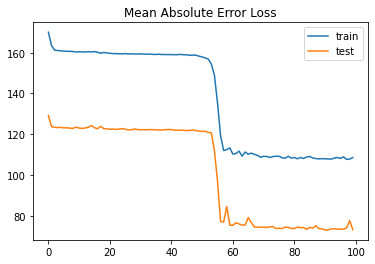

In [15]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 2

In [16]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [17]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [18]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 170.0564 - mean_absolute_error: 165.5620 - val_loss: 129.3448 - val_mean_absolute_error: 128.0520
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 165.0125 - mean_absolute_error: 164.3404 - val_loss: 123.6343 - val_mean_absolute_error: 122.8031
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 161.1766 - mean_absolute_error: 160.4191 - val_loss: 123.5854 - val_mean_absolute_error: 122.9111
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 161.0869 - mean_absolute_error: 160.3808 - val_loss: 123.3836 - val_mean_absolute_error: 122.8167
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 160.8109 - mean_absolute_error: 160.2331 - val_loss: 123.4773 - val_mean_absolute_error: 122.9397
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 160.7661 - mean_absolute_error: 160.2656 - val_loss: 123.2817 - val_mean

Epoch 49/100
63/63 [==============================] - 0s 2ms/step - loss: 159.1497 - mean_absolute_error: 158.3792 - val_loss: 122.2304 - val_mean_absolute_error: 121.4342
Epoch 50/100
63/63 [==============================] - 0s 3ms/step - loss: 159.1046 - mean_absolute_error: 158.2787 - val_loss: 122.1271 - val_mean_absolute_error: 121.2655
Epoch 51/100
63/63 [==============================] - 0s 3ms/step - loss: 158.9506 - mean_absolute_error: 158.0915 - val_loss: 122.2020 - val_mean_absolute_error: 121.3233
Epoch 52/100
63/63 [==============================] - 0s 3ms/step - loss: 158.6516 - mean_absolute_error: 157.7394 - val_loss: 122.3513 - val_mean_absolute_error: 121.4012
Epoch 53/100
63/63 [==============================] - 0s 3ms/step - loss: 158.4616 - mean_absolute_error: 157.4702 - val_loss: 121.8942 - val_mean_absolute_error: 120.8490
Epoch 54/100
63/63 [==============================] - 0s 3ms/step - loss: 157.8438 - mean_absolute_error: 156.7315 - val_loss: 122.5235 - va

63/63 [==============================] - 0s 2ms/step - loss: 109.1992 - mean_absolute_error: 106.2275 - val_loss: 74.9451 - val_mean_absolute_error: 71.9902
Epoch 98/100
63/63 [==============================] - 0s 2ms/step - loss: 108.6992 - mean_absolute_error: 105.7261 - val_loss: 74.5024 - val_mean_absolute_error: 71.5365
Epoch 99/100
63/63 [==============================] - 0s 2ms/step - loss: 108.0463 - mean_absolute_error: 105.0706 - val_loss: 74.3471 - val_mean_absolute_error: 71.4098
Epoch 100/100
63/63 [==============================] - 0s 2ms/step - loss: 108.4241 - mean_absolute_error: 105.4897 - val_loss: 73.9122 - val_mean_absolute_error: 70.9712


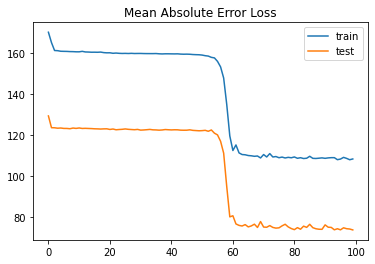

In [19]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 3

In [20]:
#mean_squared_logarithmic_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [21]:
classifier.compile(optimizer='adam',loss='mean_squared_logarithmic_error',metrics=['mse'])

In [22]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 5ms/step - loss: 19.8462 - mse: 94895.3594 - val_loss: 14.7182 - val_mse: 65642.4766
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 15.4883 - mse: 94880.2500 - val_loss: 12.7644 - val_mse: 65607.1562
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 10.9135 - mse: 93647.7344 - val_loss: 5.7534 - val_mse: 61149.6562
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 6.3982 - mse: 87661.1406 - val_loss: 4.7447 - val_mse: 58334.7461
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 5.5964 - mse: 86026.3047 - val_loss: 4.3677 - val_mse: 57068.2227
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 5.2390 - mse: 85353.9297 - val_loss: 3.9925 - val_mse: 56790.6211
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 4.7440 - mse: 85078.0781 - val_loss: 3.8162 - val_mse: 57472.0820
Epoch 8/100
63/63 [===

63/63 [==============================] - 0s 2ms/step - loss: 3.8663 - mse: 84084.8828 - val_loss: 3.2726 - val_mse: 55574.9102
Epoch 60/100
63/63 [==============================] - 0s 2ms/step - loss: 3.8722 - mse: 83908.0703 - val_loss: 3.2415 - val_mse: 55964.0391
Epoch 61/100
63/63 [==============================] - 0s 2ms/step - loss: 3.8798 - mse: 83479.3984 - val_loss: 3.1808 - val_mse: 57006.6250
Epoch 62/100
63/63 [==============================] - 0s 2ms/step - loss: 3.8558 - mse: 84315.5391 - val_loss: 3.2660 - val_mse: 55632.6406
Epoch 63/100
63/63 [==============================] - 0s 2ms/step - loss: 3.8673 - mse: 83628.2422 - val_loss: 3.3426 - val_mse: 56347.0586
Epoch 64/100
63/63 [==============================] - 0s 2ms/step - loss: 3.8588 - mse: 84173.5703 - val_loss: 3.2797 - val_mse: 56511.6836
Epoch 65/100
63/63 [==============================] - 0s 2ms/step - loss: 3.8747 - mse: 83940.2109 - val_loss: 3.2032 - val_mse: 57024.8828
Epoch 66/100
63/63 [=============

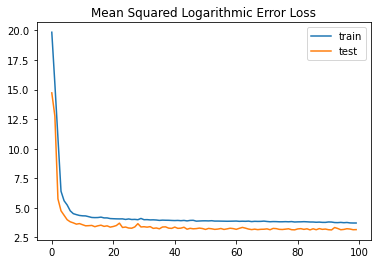

In [23]:
# plot loss during training
plt.title('Mean Squared Logarithmic Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 4

In [24]:
# define model for MSE Loss
#mean_squared_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [25]:
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [26]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=10,epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 3ms/step - loss: 92541.0781 - mse: 92534.2656 - val_loss: 54007.3594 - val_mse: 53998.9531
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 73020.7109 - mse: 73009.8516 - val_loss: 48551.0625 - val_mse: 48539.1328
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 71383.8359 - mse: 71371.0234 - val_loss: 49146.2656 - val_mse: 49131.5312
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 70080.3984 - mse: 70064.5938 - val_loss: 47568.9805 - val_mse: 47551.4219
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 67618.3281 - mse: 67599.3281 - val_loss: 45914.6875 - val_mse: 45893.8867
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 63444.1680 - mse: 63421.9375 - val_loss: 45327.2930 - val_mse: 45303.2266
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 60500.3203 - mse: 60475.4727 - 

Epoch 56/100
100/100 [==============================] - 0s 2ms/step - loss: 40735.3164 - mse: 40695.9414 - val_loss: 23696.1270 - val_mse: 23656.8027
Epoch 57/100
100/100 [==============================] - 0s 2ms/step - loss: 41089.3867 - mse: 41049.9609 - val_loss: 23951.0527 - val_mse: 23911.5254
Epoch 58/100
100/100 [==============================] - 0s 2ms/step - loss: 41026.1133 - mse: 40986.5117 - val_loss: 23656.3477 - val_mse: 23616.7871
Epoch 59/100
100/100 [==============================] - 0s 2ms/step - loss: 40942.3047 - mse: 40902.6172 - val_loss: 23920.6992 - val_mse: 23880.9707
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 40866.2148 - mse: 40826.4375 - val_loss: 24229.1621 - val_mse: 24189.2637
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 41011.9531 - mse: 40972.0859 - val_loss: 23648.7754 - val_mse: 23608.8809
Epoch 62/100
100/100 [==============================] - 0s 2ms/step - loss: 40961.2695 - mse: 40921.

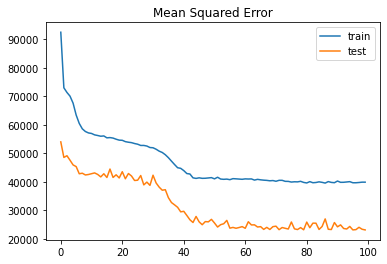

In [27]:
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()